## CNN 모델 구현해 보기
### 데이터 셋 : Cifar10

### 학습 내용
* 신경망 모델을 구현해 본다.
* 실제 이미지를 이용하여 예측을 수행해 본다.

### 학습 환경
 * Tensorflow 1.x 
    * google colab에서 tf1.x 선택 시 : %tensorflow_version 1.x

In [1]:
from keras.datasets import cifar10
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [5]:
num_classes = 10

In [6]:
### label의 이름
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
# The data, split between train and test sets:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_train.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
50000 test samples


In [13]:
x_train_n = X_train.copy()
y_train_n = y_train.copy()

label=[6 9 9 4 1 1 2 7 8 3 4 7 7 2 9]


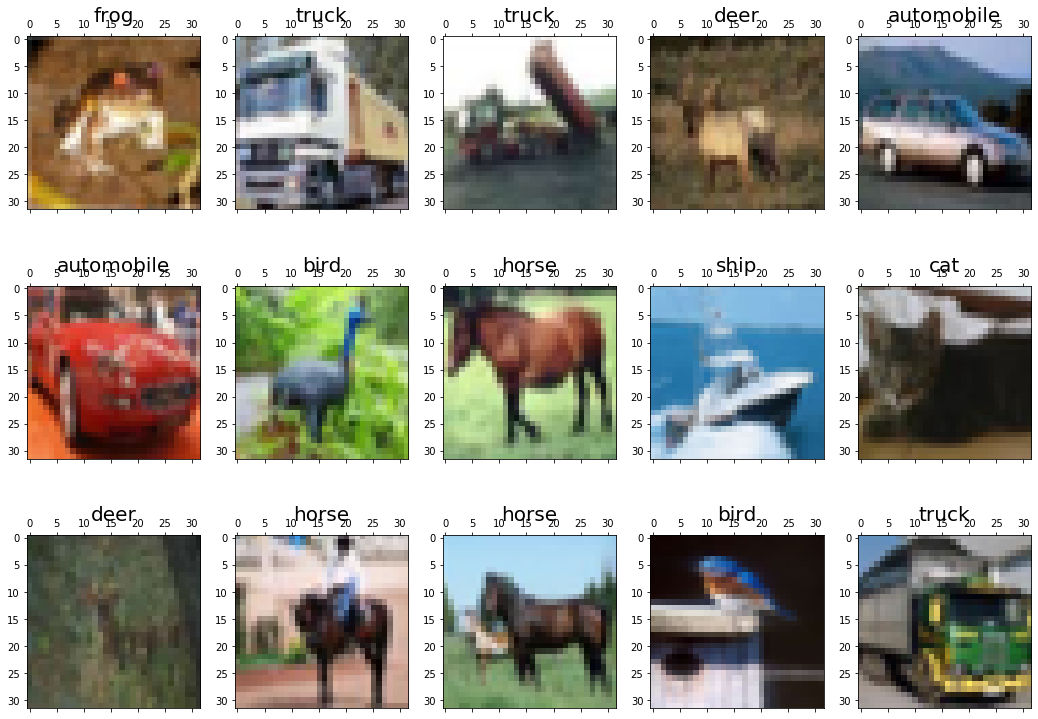

In [14]:
# print("label={}".format(y_train[0:15,0]))   # x데이터 0~14개 가져오기

img_num = y_train[0:15,0]
img_num

figure,axes = plt.subplots(nrows=3, ncols=5)  # 3행 5열의 구조 
figure.set_size_inches(18,13)  # 전체 크기
print("label={}".format(y_train[0:15,0]))   # x데이터 0~14개 가져오기

col = 0
for row in range(0,3):
    col = row * 5
    axes[row][0].matshow(X_train[col])  # 0,5,10의 값을 갖는 위치 값 이미지 표시
    axes[row][0].set_title(label_names[img_num[col]], fontsize=20)
    axes[row][1].matshow(X_train[col+1])# 1,6,11의 값을 갖는 위치 값 이미지 표시
    axes[row][1].set_title(label_names[img_num[col+1]], fontsize=20)
    axes[row][2].matshow(X_train[col+2])# 2,7,12의 값을 갖는 위치 값 이미지 표시
    axes[row][2].set_title(label_names[img_num[col+2]], fontsize=20)
    axes[row][3].matshow(X_train[col+3])# 3,8,13의 값을 갖는 위치 값 이미지 표시
    axes[row][3].set_title(label_names[img_num[col+3]], fontsize=20)
    axes[row][4].matshow(X_train[col+4])# 4,9,114의 값을 갖는 위치 값 이미지 표시
    axes[row][4].set_title(label_names[img_num[col+4]], fontsize=20)

In [15]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [16]:
X = tf.placeholder(tf.float32, [None, 32, 32, 3])
Y = tf.placeholder(tf.float32, [None, 10])

### 신경망 구성

In [17]:
W1 = tf.Variable(tf.random_normal([3,3,3,32], stddev=0.01))
L1 = tf.nn.conv2d(X, W1, strides=[1,1,1,1], padding='SAME')
L1 = tf.nn.relu(L1) ## 활성화 함수
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(L1)

Tensor("MaxPool:0", shape=(?, 16, 16, 32), dtype=float32)


In [18]:
W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding='SAME')
L2 = tf.nn.relu(L2) ## 활성화 함수
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(L2)

Tensor("MaxPool_1:0", shape=(?, 8, 8, 64), dtype=float32)


In [19]:
W3 = tf.Variable(tf.random_normal([8 * 8 * 64, 256], stddev=0.01))
L3 = tf.reshape(L2, [-1, 8 *8 * 64])
L3 = tf.matmul(L3, W3)
L3 = tf.nn.relu(L3)
print(L3)

Tensor("Relu_2:0", shape=(?, 256), dtype=float32)


In [20]:
W4 = tf.Variable(tf.random_normal([256,10], stddev=0.01))
model = tf.matmul(L3, W4)
model

<tf.Tensor 'MatMul_1:0' shape=(?, 10) dtype=float32>

In [21]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [22]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [25]:
batch_size = 100
total_batch = int(X_train.shape[0]/ batch_size)
total_batch
epochs = 20

In [26]:
# 다음 배치를 읽어오기 위한 next_batch 유틸리티 함수를 정의합니다.
def next_batch(start, num, data, labels):
  '''
  num 개수 만큼의 랜덤한 샘플들과 레이블들을 리턴합니다.
  '''
  # idx = np.arange(0 , len(data))
  # np.random.shuffle(idx)
  # idx = idx[:num]
  # data_shuffle = [data[i] for i in idx]
  # labels_shuffle = [labels[i] for i in idx]
    
  '''
  num 개수 만큼의 샘플과 레이블들을 리턴합니다.
  '''
  data_X = data[start:start+num]
  data_y = labels[start:start+num]
    
  return np.asarray(data_X), np.asarray(data_y)

In [28]:
print(X_train.shape, y_train.shape)
batch_x, batch_y = next_batch(0, 10, X_train, y_train)
print(batch_x.shape, batch_y.shape)

(50000, 32, 32, 3) (50000, 10)
(10, 32, 32, 3) (10, 10)


In [ ]:
%%time

total_cost = 0
epoch = 0
print("전체 입력 데이터 : {}".format(X_train.shape))
print("전체 출력 데이터 : {}".format(y_train.shape))

for epoch in range(5+1):
    total_cost = 0
    for i in range(total_batch):
      batch_xs, batch_ys = next_batch(batch_size*i, batch_size, X_train, y_train)
      # 이미지 데이터를 CNN 모델을 위한 자료형태인 [32 32 3] 의 형태로 재구성합니다.
      batch_xs = batch_xs.reshape(-1, 32, 32, 3)
      _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
      total_cost += cost_val

      if (i==0 or i==total_batch-1):
        print('data_step = {}, Avg. cost = {:.3f}'.format(i, cost_val))
    print('epoch: {} total.cost = {:.3f}'.format(epoch, total_cost)) 

전체 입력 데이터 : (50000, 32, 32, 3)
전체 출력 데이터 : (50000, 10)
data_step = 0, Avg. cost = 2.308
data_step = 499, Avg. cost = 1.343
epoch: 0 total.cost = 748.447
data_step = 0, Avg. cost = 1.128
data_step = 499, Avg. cost = 1.101
epoch: 1 total.cost = 525.083
data_step = 0, Avg. cost = 0.905
data_step = 499, Avg. cost = 0.923
epoch: 2 total.cost = 433.840
data_step = 0, Avg. cost = 0.772
data_step = 499, Avg. cost = 0.622
epoch: 3 total.cost = 372.203
data_step = 0, Avg. cost = 0.763


In [ ]:
print(X_test.shape, y_test.shape)

In [ ]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: X_train.reshape(-1, 32, 32, 3),
                                   Y: y_train}))

In [ ]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: X_test.reshape(-1, 32, 32, 3),
                                   Y: y_test}))

## 실제 검색 이미지를 이용한 예측

In [ ]:
import cv2

In [ ]:
image_w = 32
image_h = 32

In [ ]:
img = cv2.imread('../img/ship.jpg')
print(img.shape[1], img.shape[0])   # 가로 이미지, 세로 이미지 크기

In [ ]:
plt.matshow(img)

### 이미지 크기 조정

In [ ]:
img = cv2.resize(img, None, fx=image_w/img.shape[1], fy=image_h/img.shape[0])

In [ ]:
plt.matshow(img)
img.shape

In [ ]:
print(img.shape)
img_re = img.reshape(1, 32*32*3)
# img_re = img_re.astype('float32') / 255.0
print(img_re.shape)
img_re

In [ ]:
y_train_n[0:15]

In [ ]:
### label의 이름
#label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
#               'dog', 'frog', 'horse', 'ship', 'truck']

result = tf.argmax(model, 1)
res_idx = sess.run(result, feed_dict={X: img_re.reshape(-1, 32, 32, 3)})
print('예측 레이블 :', label_names[res_idx[0]])

### 실습해 보기
* 정확도를 올리기 위해 어떤 것을 개선해야 할지 알아보자. 이를 수행해 보자.
* 다른 이미지를 이용하여 실제로 예측이 잘 수행되는지 확인해 보자.